In [1]:
# Load Biospytial modules and etc.
%matplotlib inline
import sys
sys.path.append('/apps')
sys.path.append('..')
import django
django.setup()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')
import tools

In [2]:
## Sectionate by coordinates
##minx = -85
##maxx = -80
##miny = 30
##maxy = 35


### PATH information for running in the Biospytial container
#plotdata_path = "/RawDataCSV/idiv_share/plotsClimateData_11092017.csv"
#empirical_data_path = "/apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv"


In [3]:
run ../HEC_runs/fit_fia_logbiomass_logspp_GLS.py /RawDataCSV/idiv_share/plotsClimateData_11092017.csv /apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv -85 -80 30 35

/opt/conda/envs/biospytial/lib/python2.7/site-packages/IPython/utils/py3compat.py:289: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  builtin_mod.execfile(filename, *where)


KeyboardInterrupt: 

# From here downwards it's the forensic analysis.

In [4]:
from HEC_runs.fit_fia_logbiomass_logspp_GLS import prepareDataFrame, createMaternVariogram, buildSpatialStructure, calculateGLS

In [5]:
new_data = prepareDataFrame("/RawDataCSV/idiv_share/plotsClimateData_11092017.csv")

/opt/conda/envs/biospytial/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reprojecting to Alberts equal area
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Removing possible duplicates. 
 This avoids problems of Non Positive semidefinite


In [6]:
gvg,tt = createMaternVariogram("/apps/external_plugins/spystats/HEC_runs/results/logbiomas_logsppn_res.csv",new_data)

INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Reading the empirical Variogram file
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Instantiating a Variogram object with the values calculated before
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Dropping possible Nans
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Instantiating Matern Model...
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:fitting Matern Model with the empirical variogram
../tools.py:510: RuntimeWarning: divide by zero encountered in power
  rho_h = a * np.power(b,kappa) * K_v_b
/opt/conda/envs/biospytial/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
INFO:HEC_runs.fit_fia_logbiomass_logspp_GLS:Matern Model fitted


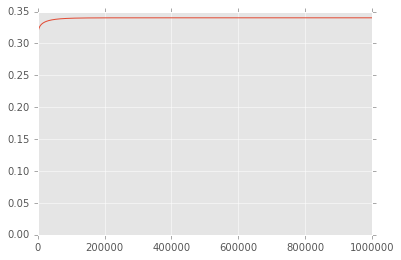

In [7]:
import numpy as np
xx = np.linspace(0,1000000,1000)
plt.plot(xx,gvg.model.f(xx))

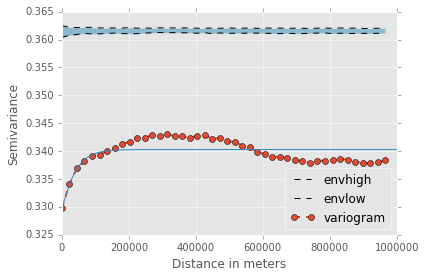

In [18]:
gvg.plot(refresh=False)
plt.plot(xx,gvg.model.f(xx))

In [9]:
type(gvg.model)

tools.MaternVariogram

In [10]:
matern_model = tools.MaternVariogram(sill=0.34,range_a=100000,nugget=0.0,kappa=0.5)
whittle_model = tools.WhittleVariogram(sill=0.34,range_a=100000,nugget=0.0,alpha=3)

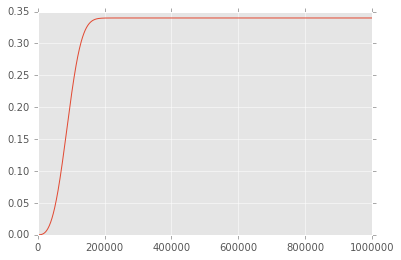

In [11]:
plt.plot(xx,whittle_model.f(xx))

In [27]:
expm = tools.ExponentialVariogram(sill=0.34,range_a=100000,nugget=0.2)

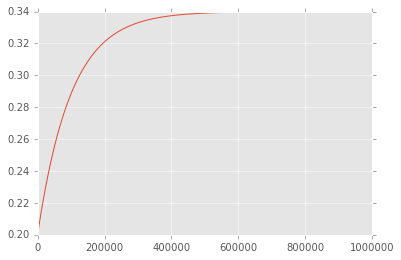

In [28]:
plt.plot(xx,expm.f(xx))
y = expm.f(xx)

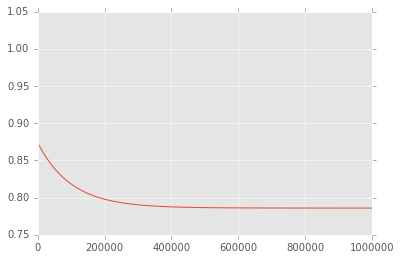

In [44]:
plt.plot(xx,(expm.corr_f(xx)))

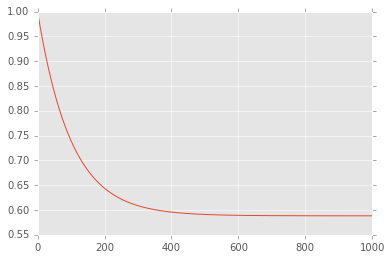

In [40]:

plt.plot((1 - ((y - 0.2) / 0.34)))

In [14]:
gvg.model = whittle_model

In [17]:
gvg.fitVariogramModel(whittle_model)

../tools.py:540: RuntimeWarning: divide by zero encountered in power
  g_h = ((sill - nugget)*(1 - np.exp(-(h**alpha / range_a**alpha)))) + nugget*Ih


< Whittle Variogram : sill 0.340274656891, range 41061.6971399, nugget 0.329817414704, alpha1.12113685018 >

In [ ]:
data.to_csv("reproj_plotsClimateData_11092017.csv")